<a href="https://colab.research.google.com/github/jayeshhh04/ML-project/blob/main/USD_INR_price_prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/INR18MARCH.csv")

In [ ]:
# Display the first few rows of the dataset
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2023-03-17  82.622803  82.867798  82.420502  82.622803  82.622803       0
1  2023-03-20  82.532997  82.724297  82.439003  82.532997  82.532997       0
2  2023-03-21  82.529099  82.764297  82.490501  82.529099  82.529099       0
3  2023-03-22  82.677002  82.882301  82.532997  82.677002  82.677002       0
4  2023-03-23  82.525803  82.529297  82.047096  82.525803  82.525803       0


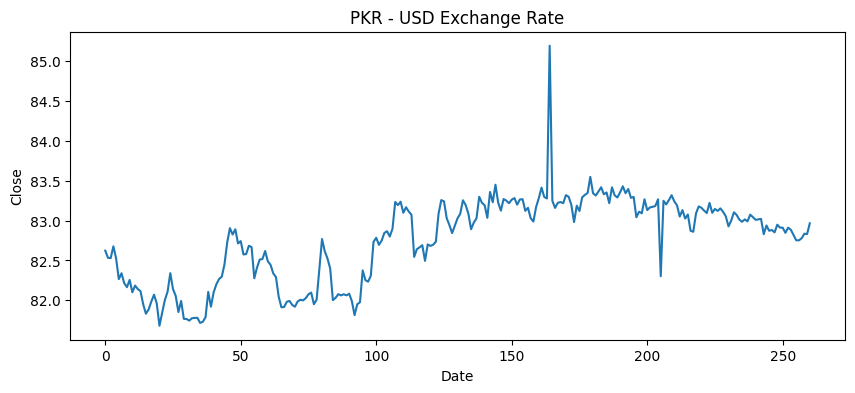

In [ ]:
# Visualize the PKR - USD Exchange Rate
plt.figure(figsize=(10, 4))
plt.title("PKR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()


<ipython-input-47-e50f32fc102b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-47-e50f32fc102b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.924413  0.867168  1.000000   1.000000     NaN
High       0.924413  1.000000  0.857212  0.924413   0.924413     NaN
Low        0.867168  0.857212  1.000000  0.867168   0.867168     NaN
Close      1.000000  0.924413  0.867168  1.000000   1.000000     NaN
Adj Close  1.000000  0.924413  0.867168  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


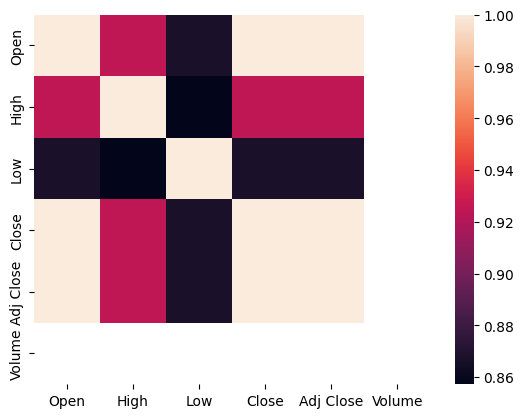

In [ ]:
# Check the correlation between variables
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [ ]:
# Define features (X) and target variable (y)
X = data[["Open", "High", "Low"]]
y = data["Close"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R-squared: {r2}")

In [ ]:
# Evaluate Linear Regression model
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression MSE: 0.0
Linear Regression R-squared: 1.0


In [ ]:
# Evaluate Random Forest Regression model
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression MSE: 6.014380611480699e-05
Random Forest Regression R-squared: 0.9997627270841409


In [ ]:
# Evaluate KNN Regression model
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regression")


K-Nearest Neighbors Regression MSE: 0.010208747998311313
K-Nearest Neighbors Regression R-squared: 0.9597255384834548


In [ ]:
# Evaluate SVR model
evaluate_model(y_test, y_pred_svr, "SVR")

SVR MSE: 0.0055718794515246545
SVR R-squared: 0.9780184166968977


In [ ]:
# Comparison of models
models = ["Linear Regression", "Random Forest Regression", "KNN Regression", "SVR"]
mses = [mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_knn),
        mean_squared_error(y_test, y_pred_svr)]
r2s = [r2_score(y_test, y_pred_linear),
       r2_score(y_test, y_pred_rf),
       r2_score(y_test, y_pred_knn),
       r2_score(y_test, y_pred_svr)]

comparison_df = pd.DataFrame({"Model": models, "MSE": mses, "R-squared": r2s})
print(comparison_df)

                      Model       MSE  R-squared
0         Linear Regression  0.000000   1.000000
1  Random Forest Regression  0.000060   0.999763
2            KNN Regression  0.010209   0.959726
3                       SVR  0.005572   0.978018


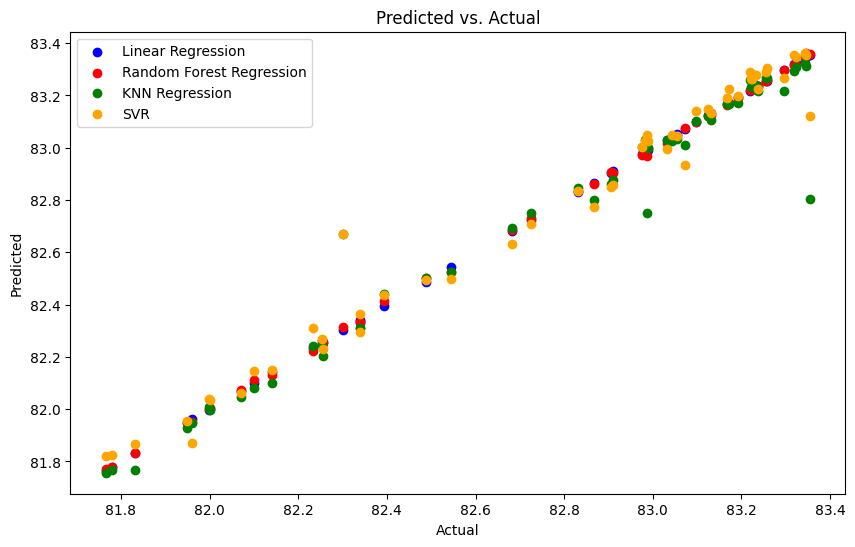

In [ ]:
# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Regression')
plt.scatter(y_test, y_pred_knn, color='green', label='KNN Regression')
plt.scatter(y_test, y_pred_svr, color='orange', label='SVR')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.legend()
plt.show()